In [4]:
from keras.datasets import mnist
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

from keras import Sequential
from keras.activations import relu, softmax
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Aufgabe 7

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [33]:
test_parameter = ParameterGrid({
    'kernel_size': [(3, 3), (4, 4), (5, 5)],
    'pool_size': [(3, 3), (4, 4), (5, 5)],
    'dilation': [1, 2]
})

In [122]:
def runCNN(kernel_size: tuple[int, int], pool_size: tuple[int, int], dilation: int, output_wrongs = 0, accurate = False):
    model = Sequential()
    model.add(Conv2D(28, kernel_size=kernel_size, input_shape=(28, 28, 1), dilation_rate=dilation))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(128, activation=relu))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation=softmax))

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    if accurate:
        model.fit(x_train, y_train, epochs=10)
    else:
        model.fit(x_train[:10000], y_train[:10000], epochs=3)
    loss, accuracy = model.evaluate(x_test, y_test)

    predict = model.predict(x_test)
    predict_max = predict.argmax(axis=-1)

    if output_wrongs > 0:
        wrongs = []
        wrong_count = 0
        for i, predicted in enumerate(predict_max):
            if y_test[i] != predicted:
                wrong_count += 1
                if len(wrongs) < output_wrongs:
                    wrongs.append( x_test[i])
        print(f"Number of wrong images: {wrong_count}")
        return wrongs

    return {
        "loss": loss,
        "accuracy": accuracy,
        "f1": f1_score(y_test, predict_max, average="macro"),
        "recall": recall_score(y_test, predict_max, average="macro"),
        "precision": precision_score(y_test, predict_max, average="macro")
    }

In [35]:
scores = {}
for params in test_parameter:
    print("Train:", params)
    score = runCNN(**params)
    scores[(params["dilation"], params["kernel_size"], params["pool_size"])] = score
print(scores)

Train: {'dilation': 1, 'kernel_size': (3, 3), 'pool_size': (3, 3)}
Epoch 1/3
313/313 [==============================] - 2s 4ms/step - loss: 1.9723 - accuracy: 0.6925
Epoch 2/3
313/313 [==============================] - 1s 4ms/step - loss: 0.5452 - accuracy: 0.8393
Epoch 3/3
313/313 [==============================] - 1s 2ms/step
Train: {'dilation': 1, 'kernel_size': (3, 3), 'pool_size': (4, 4)}
Epoch 1/3
313/313 [==============================] - 2s 4ms/step - loss: 3.1182 - accuracy: 0.6984
Epoch 2/3
313/313 [==============================] - 1s 4ms/step - loss: 0.5680 - accuracy: 0.8451
Epoch 3/3
313/313 [==============================] - 1s 2ms/step
Train: {'dilation': 1, 'kernel_size': (3, 3), 'pool_size': (5, 5)}
Epoch 1/3
313/313 [==============================] - 2s 4ms/step - loss: 2.2980 - accuracy: 0.7224
Epoch 2/3
313/313 [==============================] - 1s 4ms/step - loss: 0.4454 - accuracy: 0.8678
Epoch 3/3
313/313 [==============================] - 1s 2ms/step
Train: {'d

In [36]:
import pandas as pd

score_table = pd.DataFrame.from_dict(scores, orient="index")
score_table.sort_index()

loss  accuracy        f1    recall  precision
1 (3, 3) (3, 3)  0.260179    0.9328  0.932197  0.932307   0.933334
         (4, 4)  0.330686    0.9216  0.921138  0.920672   0.924210
         (5, 5)  0.239225    0.9332  0.932426  0.932318   0.933944
  (4, 4) (3, 3)  0.268671    0.9355  0.934719  0.935033   0.934985
         (4, 4)  0.289309    0.9267  0.925716  0.924861   0.929862
         (5, 5)  0.259952    0.9325  0.931900  0.932431   0.932325
  (5, 5) (3, 3)  0.257987    0.9388  0.937960  0.938537   0.938419
         (4, 4)  0.235217    0.9407  0.940248  0.940456   0.941580
         (5, 5)  0.216189    0.9424  0.941967  0.941937   0.942308
2 (3, 3) (3, 3)  0.265903    0.9310  0.930059  0.930256   0.930915
         (4, 4)  0.271771    0.9236  0.922944  0.922965   0.924882
         (5, 5)  0.224906    0.9397  0.939145  0.939094   0.939790
  (4, 4) (3, 3)  0.367717    0.9152  0.913781  0.914688   0.914349
         (4, 4)  0.248666    0.9403  0.939860  0.939973   0.940956
         (5, 5)  0.244913    0.9343  0.933718  0.933417   0.935256
  (5, 5) (3, 3)  0.330009    0.9212  0.920126  0.919967   0.920715
         (4, 4)  0.275709    0.9349  0.934677  0.933839   0.937099
         (5, 5)  0.219190    0.9424  0.941709  0.942145   0.941836

**Kernelgrößen**

In [43]:
score_table.groupby(level=[1]).mean()

,loss,accuracy,f1,recall,precision
"(3, 3)",0.265445,0.930317,0.929652,0.929602,0.931179
"(4, 4)",0.279871,0.930750,0.929949,0.930067,0.931289
"(5, 5)",0.255717,0.936733,0.936114,0.936147,0.936993


**Poolinggrößen**

In [42]:
score_table.groupby(level=[2]).mean()

,loss,accuracy,f1,recall,precision
"(3, 3)",0.291744,0.929083,0.928140,0.928465,0.928786
"(4, 4)",0.275226,0.931300,0.930764,0.930461,0.933098
"(5, 5)",0.234062,0.937417,0.936811,0.936890,0.937577


**Dilation**

In [41]:
score_table.groupby(level=[0]).mean()

,loss,accuracy,f1,recall,precision
1,0.261935,0.9338,0.933141,0.933172,0.934552
2,0.272087,0.9314,0.930669,0.930705,0.931755


**Minimum**

In [94]:
score_mins = {
    "dilation": [val[0] for val in score_table.idxmin().values],
    "kernel_size": [val[1] for val in score_table.idxmin().values],
    "pool_size": [val[2] for val in score_table.idxmin().values],
    "minimum": score_table.min()
}
pd.DataFrame(score_mins)

,dilation,kernel_size,pool_size,minimum
loss,1,"(5, 5)","(5, 5)",0.216189
accuracy,2,"(4, 4)","(3, 3)",0.915200
f1,2,"(4, 4)","(3, 3)",0.913781
recall,2,"(4, 4)","(3, 3)",0.914688
precision,2,"(4, 4)","(3, 3)",0.914349


**Maximum**

In [91]:
score_maxs = {
    "dilation": [val[0] for val in score_table.idxmax().values],
    "kernel_size": [val[1] for val in score_table.idxmax().values],
    "pool_size": [val[2] for val in score_table.idxmax().values],
    "maximum": score_table.max()
}
pd.DataFrame(score_maxs)

,dilation,kernel_size,pool_size,maximum
loss,2,"(4, 4)","(3, 3)",0.367717
accuracy,1,"(5, 5)","(5, 5)",0.942400
f1,1,"(5, 5)","(5, 5)",0.941967
recall,2,"(5, 5)","(5, 5)",0.942145
precision,1,"(5, 5)","(5, 5)",0.942308


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8275 - accuracy: 0.8577
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2084 - accuracy: 0.9402
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1685 - accuracy: 0.9531
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1456 - accuracy: 0.9604
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1433 - accuracy: 0.9610
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1238 - accuracy: 0.9668
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1249 - accuracy: 0.9666
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1172 - accuracy: 0.9686
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1132 - accuracy: 0.9708
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
Number of wrong

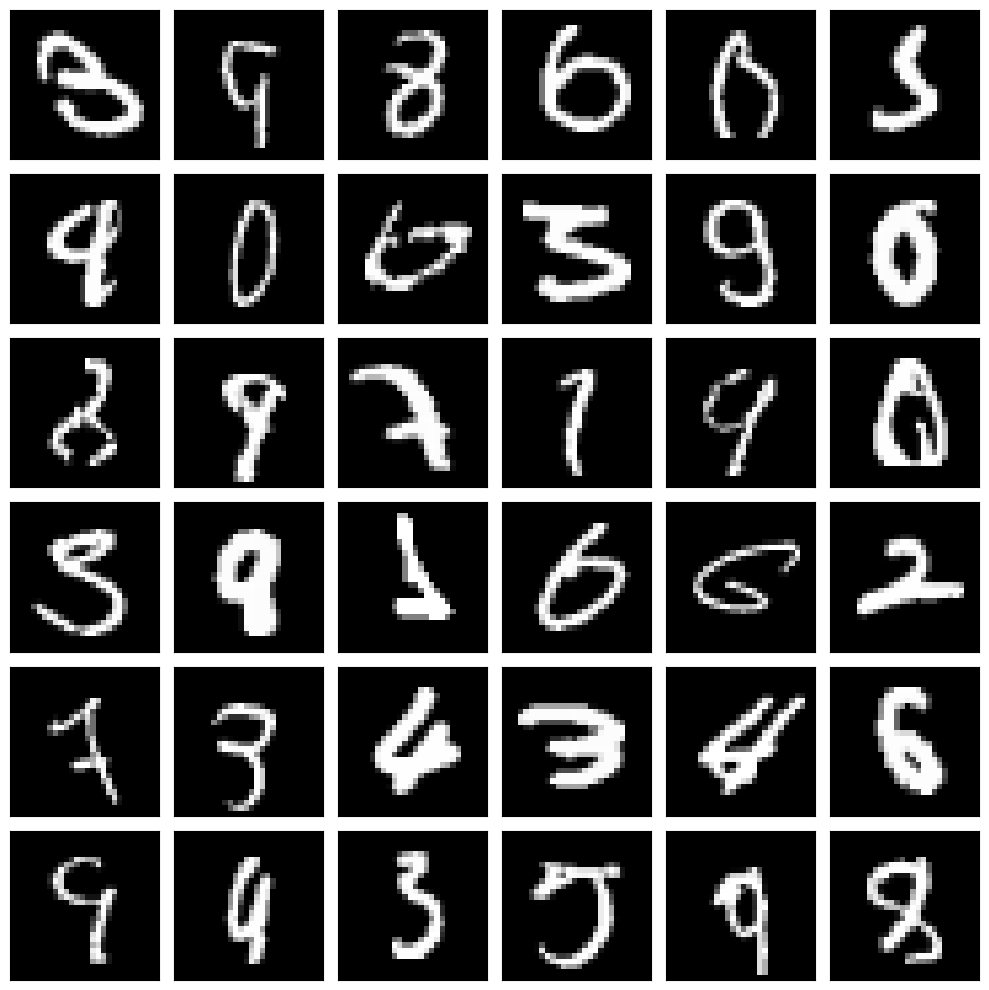

In [123]:
import numpy as np

best_method = [(5,5), (5,5), 1]
images = runCNN(*best_method, output_wrongs=36, accurate=True)

num_images = len(images)
rows = cols = int(np.sqrt(num_images))

# Create a grid for displaying the images
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

# Remove axis labels for all subplots
for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the images in the grid
for i in range(num_images):
    row = i // cols
    col = i % cols
    axes[row, col].imshow(images[i], cmap='gray')  # Use 'gray' colormap for grayscale images

# Adjust layout and display the plot
plt.tight_layout()
plt.show()